## Q1

In [2]:
import pandas as pd

In [3]:
listings_df = pd.read_csv('listings.csv')
calendar_df = pd.read_csv('calendar.csv')

In [4]:
calendar_df

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [431]:
list_of_variables = ['host_response_rate','host_acceptance_rate',
                    'host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms',
                     'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit',
                     'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 
                     'maximum_nights', 'availability_30', 'availability_90', 'availability_365',
                     'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
                     'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                     'review_scores_value', 'reviews_per_month']

In [432]:
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.rstrip('%').str.replace(',', '')
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].str.rstrip('%').str.replace(',', '')
listings_df['price'] = listings_df['price'].str.replace('$', '').str.replace(',', '').astype(float)
listings_df['weekly_price'] = listings_df['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
listings_df['monthly_price'] = listings_df['monthly_price'].str.replace('$', '').str.replace(',', '').astype(float)
listings_df['security_deposit']= listings_df['security_deposit'].str.replace('$', '').str.replace(',', '')
listings_df['cleaning_fee']= listings_df['cleaning_fee'].str.replace('$', '').str.replace(',', '')
listings_df['extra_people']= listings_df['extra_people'].str.replace('$', '').str.replace(',', '')

In [433]:
for i in list_of_variables:
    listings_df[i] = pd.to_numeric(listings_df[i], errors='coerce')

In [434]:
summary_stats = listings_df[list_of_variables].agg(['min', 'max', 'mean', 'median', 'var', 'std'])

In [435]:
summary_stats

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,reviews_per_month
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,80.000000,...,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,0.010000
max,100.000000,100.000000,749.000000,749.000000,16.000000,6.000000,5.000000,16.000000,4000.000000,5000.000000,...,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.150000
mean,94.989082,84.173089,58.902371,58.902371,3.041283,1.221647,1.255944,1.609060,173.925802,922.392377,...,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.168234,1.970908
median,100.000000,94.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,150.000000,750.000000,...,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.170000
var,156.692460,474.335915,29281.939127,29281.939127,3.164590,0.251489,0.567099,1.023627,22002.180877,432729.542837,...,1099.471017,20202.693559,1265.342874,90.853031,0.868369,1.366507,0.581793,0.540971,1.022356,4.496781
std,12.517686,21.779254,171.119663,171.119663,1.778929,0.501487,0.753060,1.011745,148.331321,657.821817,...,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,1.011116,2.120561


## Q2

In [436]:
import nltk

In [8]:
reviews_df = pd.read_csv('reviews.csv')
reviews_df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [438]:
nltk.download('punkt')
nltk.download('vader_lexicon')
#from textblob import TextBlob
import pandas as pd
import numpy as np
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

[nltk_data] Downloading package punkt to /Users/kei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kei/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [439]:
sentiment_analysis_columns = ['negativity', 'neutrality', 'positivity', 'compound']

file_names = [...]

sid = SentimentIntensityAnalyzer()

negativity_list = []
positivity_list = []
neutrality_list = []
compound_list = []

for i in range(len(file_names)):
    expanded_text_dataset = []
    column_names = list(reviews_df.columns.values)
    all_columns = column_names + sentiment_analysis_columns
    text_segment_list = list(reviews_df['comments'])
    for j in range(len(text_segment_list)):
        row_info = list(reviews_df.iloc[j])
        text = str(text_segment_list[j])
        ##Sentiment analysis
        try:
            ss = sid.polarity_scores(text)
            negativity = ss['neg']
            neutrality = ss['neu']
            positivity = ss['pos']
            compound = ss['compound']
            negativity_list.append(negativity)
            positivity_list.append(positivity)
            neutrality_list.append(neutrality)
            compound_list.append(compound)
        except Exception as Errors:
            print(Errors)
    reviews_df['Negativity'] = negativity_list
    reviews_df['Positivity'] = positivity_list
    reviews_df['Neutrality'] = neutrality_list
    reviews_df['Compound'] = compound_list

In [440]:
reviews_df

,listing_id,id,date,reviewer_id,reviewer_name,comments,Negativity,Positivity,Neutrality,Compound
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,0.000,0.352,0.648,0.9626
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.000,0.361,0.639,0.9061
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.000,0.233,0.767,0.9663
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.000,0.327,0.673,0.9267
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.000,0.363,0.637,0.8658
...,...,...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,0.000,0.054,0.946,0.3400
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,0.014,0.164,0.822,0.9504
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,0.000,0.216,0.784,0.9693
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,0.014,0.226,0.759,0.9957


In [441]:
positive_words_df = pd.read_csv('positive_words.csv')
negative_words_df = pd.read_csv('negative_words.csv')

In [442]:
positive_words = positive_words_df['a+'].tolist()
negative_words = negative_words_df['2-faced'].tolist()

In [443]:
positive_simple = []
negative_simple = []

for comment in reviews_df['comments']:
    if isinstance(comment, str):
        words = comment.split()

        total_words = len(words)
        if total_words > 0:
            positive_count = sum(1 for word in words if word.lower() in positive_words)
            negative_count = sum(1 for word in words if word.lower() in negative_words)
            positive_ratio = positive_count / total_words
            negative_ratio = negative_count / total_words
        else:
            # Handle empty comments by setting the ratios to 0
            positive_ratio = 0
            negative_ratio = 0

        positive_simple.append(positive_ratio)
        negative_simple.append(negative_ratio)
    else:
        # Replace non-string comments with 0
        positive_simple.append(0)
        negative_simple.append(0)

In [444]:
reviews_df['positive_simple'] = positive_simple
reviews_df['negative_simple'] = negative_simple

In [445]:
reviews_df

,listing_id,id,date,reviewer_id,reviewer_name,comments,Negativity,Positivity,Neutrality,Compound,positive_simple,negative_simple
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,0.000,0.352,0.648,0.9626,0.061224,0.000000
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.000,0.361,0.639,0.9061,0.125000,0.000000
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.000,0.233,0.767,0.9663,0.034884,0.023256
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.000,0.327,0.673,0.9267,0.111111,0.000000
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.000,0.363,0.637,0.8658,0.090909,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,0.000,0.054,0.946,0.3400,0.000000,0.000000
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,0.014,0.164,0.822,0.9504,0.023256,0.007752
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,0.000,0.216,0.784,0.9693,0.065217,0.000000
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,0.014,0.226,0.759,0.9957,0.064748,0.003597


## Q3

In [446]:
mean_scores = reviews_df.groupby('listing_id').agg({
    'Negativity': 'mean',
    'Positivity': 'mean',
    'Neutrality': 'mean',
    'Compound': 'mean',
    'positive_simple': 'mean',
    'negative_simple': 'mean'
}).reset_index()

In [447]:
mean_scores.rename(columns={
    'Negativity': 'negativity_mean',
    'Positivity': 'positivity_mean',
    'Neutrality': 'neutrality_mean',
    'Compound': 'compound_mean',
    'positive_simple': 'positivity_simple_mean',
    'negative_simple': 'negativity_simple_mean'
}, inplace=True)

In [448]:
mean_scores

,listing_id,negativity_mean,positivity_mean,neutrality_mean,compound_mean,positivity_simple_mean,negativity_simple_mean
0,3353,0.025971,0.267735,0.706206,0.782121,0.094641,0.008892
1,5506,0.011583,0.272639,0.715806,0.874283,0.086907,0.002254
2,6695,0.017468,0.250638,0.731851,0.857415,0.078867,0.006907
3,6976,0.010854,0.264659,0.724488,0.905349,0.083384,0.001326
4,8792,0.015722,0.294278,0.690056,0.931694,0.103256,0.004809
...,...,...,...,...,...,...,...
2824,14813006,0.000000,0.335000,0.665000,0.995900,0.092857,0.007143
2825,14823724,0.103000,0.253000,0.644000,0.817200,0.050000,0.000000
2826,14842237,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2827,14843050,0.000000,0.238000,0.762000,0.457550,0.083333,0.000000


In [449]:
listings_df = listings_df.merge(mean_scores, on='listing_id', how='left')

In [450]:
listings_df

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,negativity_mean,positivity_mean,neutrality_mean,compound_mean,positivity_simple_mean,negativity_simple_mean
0,12147973,https://www.airbnb.com/rooms/12147973,2.020000e+13,9/7/16,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,2.020000e+13,9/7/16,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,f,1,1.30,0.014000,0.321944,0.664056,0.837644,0.088948,0.006146
2,6976,https://www.airbnb.com/rooms/6976,2.020000e+13,9/7/16,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,t,f,1,0.47,0.010854,0.264659,0.724488,0.905349,0.083384,0.001326
3,1436513,https://www.airbnb.com/rooms/1436513,2.020000e+13,9/7/16,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,f,1,1.00,0.000000,0.484000,0.516000,0.950600,0.041667,0.000000
4,7651065,https://www.airbnb.com/rooms/7651065,2.020000e+13,9/7/16,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,f,1,2.25,0.017034,0.273897,0.709069,0.780959,0.095983,0.003509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,2.020000e+13,9/7/16,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,f,f,8,0.34,0.019000,0.219500,0.761500,0.811475,0.063306,0.000000
3581,14844274,https://www.airbnb.com/rooms/14844274,2.020000e+13,9/7/16,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,f,f,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,2.020000e+13,9/7/16,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,f,f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,2.020000e+13,9/7/16,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,f,f,1,2.00,0.000000,0.279500,0.720500,0.899700,0.119476,0.000000


## Q4

In [451]:
selected_vars = listings_df[['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms']]

In [452]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [453]:
selected_cols = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms']
listings_selected = listings_df[selected_cols]

In [454]:
listings_selected.fillna(0, inplace=True) 

/var/folders/_b/xdzxy1w53hj6pc7dfn4n_1t00000gn/T/ipykernel_68556/2559389178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected.fillna(0, inplace=True)


In [455]:
listings_selected.isna().sum()

property_type    0
room_type        0
accommodates     0
bathrooms        0
bedrooms         0
dtype: int64

In [456]:
listings_encoded = pd.get_dummies(listings_selected, columns=selected_cols)

In [457]:
listings_encoded

,property_type_0,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,...,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bedrooms_0.0,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,bedrooms_4.0,bedrooms_5.0
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3581,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3582,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3583,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [458]:
min_support = 0.1
frequent_itemsets = apriori(listings_encoded, min_support=min_support, use_colnames=True)

In [459]:
top_5_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(5)

### Top 5 most frequent itemsets for MinSupport=0.1

In [460]:
top_5_itemsets

,support,itemsets
8,0.767364,(bathrooms_1.0)
0,0.728591,(property_type_Apartment)
10,0.663598,(bedrooms_1.0)
16,0.597768,"(bathrooms_1.0, property_type_Apartment)"
2,0.593305,(room_type_Entire home/apt)


### Top 5 least frequent itemsets for MinSupport=0.1

In [461]:
top_5_least_frequent_itemsets = frequent_itemsets.sort_values(by='support').head(5)
top_5_least_frequent_itemsets

,support,itemsets
55,0.100418,"(bathrooms_1.0, bedrooms_2.0, room_type_Entire..."
37,0.100418,"(bathrooms_1.0, bedrooms_2.0)"
24,0.101255,"(bathrooms_2.0, room_type_Entire home/apt)"
56,0.102929,"(room_type_Private room, accommodates_1, bedro..."
27,0.102929,"(accommodates_1, room_type_Private room)"


In [462]:
min_support = 0.2

In [463]:
frequent_itemsets = apriori(listings_encoded, min_support=min_support, use_colnames=True)

### Top 5 most frequent itemsets for MinSupport=0.2

In [464]:
top_5_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(5)
top_5_itemsets

,support,itemsets
4,0.767364,(bathrooms_1.0)
0,0.728591,(property_type_Apartment)
5,0.663598,(bedrooms_1.0)
9,0.597768,"(bathrooms_1.0, property_type_Apartment)"
1,0.593305,(room_type_Entire home/apt)


### Top 5 least frequent itemsets for MinSupport=0.2

In [465]:
top_5_least_frequent_itemsets = frequent_itemsets.sort_values(by='support').head(5)
top_5_least_frequent_itemsets

,support,itemsets
30,0.216179,"(accommodates_2, bathrooms_1.0, bedrooms_1.0, ..."
29,0.217573,"(bathrooms_1.0, bedrooms_1.0, property_type_Ap..."
7,0.219247,"(room_type_Private room, property_type_Apartment)"
21,0.219247,"(room_type_Private room, bedrooms_1.0, propert..."
20,0.225105,"(bedrooms_1.0, property_type_Apartment, room_t..."


## Q5

In [466]:
from itertools import combinations

selected_col = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms']
listings_selected_new = listings_df[selected_col]

listings_selected_new.fillna(0, inplace=True)

transactions = listings_selected_new.values.tolist()

/var/folders/_b/xdzxy1w53hj6pc7dfn4n_1t00000gn/T/ipykernel_68556/3402462347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected_new.fillna(0, inplace=True)


In [467]:
min_support_values = [0.1, 0.2]

for min_support in min_support_values:
    print(f"Top 5 Most Frequent Itemsets for minSupport = {min_support}:")
    
    # Function to generate candidate itemsets
    def generate_candidates(itemset, length):
        candidates = []
        for i in range(length):
            for j in range(i + 1, length):
                new_item = list(set(itemset[i] + itemset[j]))
                if len(new_item) == length + 1:
                    candidates.append(new_item)
        return candidates
    
    # Function to calculate support for an itemset
    def calculate_support(itemset, transactions):
        count = 0
        for transaction in transactions:
            if set(itemset).issubset(set(transaction)):
                count += 1
        return count / len(transactions)
    
    # Initialize frequent itemsets
    frequent_itemsets = []
    
    # Generate frequent 1-itemsets
    unique_items = set(item for transaction in transactions for item in transaction)
    for item in unique_items:
        itemset = [item]
        support = calculate_support(itemset, transactions)
        if support >= min_support:
            frequent_itemsets.append(([item], support))
    
    # Generate frequent k-itemsets
    k = 1
    while frequent_itemsets:
        k += 1
        candidates = generate_candidates([itemset for itemset, _ in frequent_itemsets], k - 1)
        if not candidates:
            break
        frequent_itemsets = []
        for candidate in candidates:
            support = calculate_support(candidate, transactions)
            if support >= min_support:
                frequent_itemsets.append((candidate, support))
    
    # Sort the frequent itemsets by support
    frequent_itemsets.sort(key=lambda x: x[1], reverse=True)
    
    # Print the top 5 most frequent itemsets
    for idx, (itemset, support) in enumerate(frequent_itemsets[:5]):
        print(f"Top {idx + 1} Most Frequent Itemset: {itemset}, Support: {support}")
    
    print("-" * 50)

    print(f"Top 5 Least Frequent Itemsets for minSupport = {min_support}:")
    
    frequent_itemsets.sort(key=lambda x: x[1])
    
    # Print the top 5 least frequent itemsets
    for idx, (itemset, support) in enumerate(frequent_itemsets[:5]):
        print(f"Top {idx + 1} Least Frequent Itemset: {itemset}, Support: {support}")
    
    print("-" * 50)

Top 5 Most Frequent Itemsets for minSupport = 0.1:
Top 1 Most Frequent Itemset: [1.0], Support: 0.8630404463040446
Top 2 Most Frequent Itemset: ['Apartment'], Support: 0.7285913528591352
Top 3 Most Frequent Itemset: [2.0], Support: 0.6368200836820084
Top 4 Most Frequent Itemset: ['Entire home/apt'], Support: 0.5933054393305439
Top 5 Most Frequent Itemset: ['Private room'], Support: 0.38437935843793586
--------------------------------------------------
Top 5 Least Frequent Itemsets for minSupport = 0.1:
Top 1 Least Frequent Itemset: ['House'], Support: 0.15676429567642958
Top 2 Least Frequent Itemset: [3], Support: 0.16541143654114365
Top 3 Least Frequent Itemset: [4], Support: 0.19330543933054392
Top 4 Least Frequent Itemset: ['Private room'], Support: 0.38437935843793586
Top 5 Least Frequent Itemset: ['Entire home/apt'], Support: 0.5933054393305439
--------------------------------------------------
Top 5 Most Frequent Itemsets for minSupport = 0.2:
Top 1 Most Frequent Itemset: [1.0], 

## Q6

In [468]:
import statsmodels.api as sm

In [469]:
X1 = listings_df[['host_response_rate', 'review_scores_rating', 'review_scores_accuracy',
                               'review_scores_cleanliness', 'review_scores_checkin',
                               'review_scores_communication', 'positivity_mean', 'negativity_mean',
                               'positivity_simple_mean', 'negativity_simple_mean']]
Y1 = listings_df['price']

In [470]:
missing_columns = X1.columns[X1.isna().any()].tolist()
print("Columns with missing values:", missing_columns)

Columns with missing values: ['host_response_rate', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'positivity_mean', 'negativity_mean', 'positivity_simple_mean', 'negativity_simple_mean']


In [471]:
for column in missing_columns:
    mean_value = X1[column].mean()
    X1[column].fillna(mean_value, inplace=True)

/var/folders/_b/xdzxy1w53hj6pc7dfn4n_1t00000gn/T/ipykernel_68556/3349019697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[column].fillna(mean_value, inplace=True)


In [472]:
X1 = sm.add_constant(X1)

In [473]:
model_lr = sm.OLS(Y1, X1).fit()

In [474]:
model_summary_lr = model_lr.summary()
model_summary_lr

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.163
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.17e-09
Time:                        00:26:37   Log-Likelihood:                -22979.
No. Observations:                3585   AIC:                         4.598e+04
Df Residuals:                    3574   BIC:                         4.605e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         169.5185     47.422      3.575      0.000      76.541     262.496
host_response_rate             -0.1238      0.212     -0.585      0.559      -0.539       0.291
review_scores_rating            1.4614      0.580      2.518      0.012       0.323       2.600
review_scores_accuracy        -11.5925      4.427     -2.619      0.009     -20.272      -2.913
review_scores_cleanliness      17.1742      3.779      4.545      0.000       9.765      24.583
review_scores_checkin         -11.6517      5.226     -2.229      0.026     -21.899      -1.405
review_scores_communication    -6.0629      5.547     -1.093      0.274     -16.939       4.813
positivity_mean               -65.8545     48.527     -1.357      0.175    -160.999      29.289
negativity_mean               -66.3955    161.024     -0.412      0.680    -382.104     249.313
positivity_simple_mean        215.5643     99.254      2.172      0.030      20.965     410.163
negativity_simple_mean        639.3882    512.182      1.248      0.212    -364.810    1643.586
==============================================================================
Omnibus:                     5345.498   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4565211.572
Skew:                           8.717   Prob(JB):                         0.00
Kurtosis:                     176.949   Cond. No.                     2.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [475]:
coefficients_lr = model_lr.params
r_squared_lr = model_lr.rsquared

print("Linear Regression Coefficients:")
print(coefficients_lr)

print("\nR-squared Value:", r_squared)

Linear Regression Coefficients:
const                          169.518509
host_response_rate              -0.123812
review_scores_rating             1.461382
review_scores_accuracy         -11.592529
review_scores_cleanliness       17.174179
review_scores_checkin          -11.651747
review_scores_communication     -6.062882
positivity_mean                -65.854542
negativity_mean                -66.395458
positivity_simple_mean         215.564275
negativity_simple_mean         639.388247
dtype: float64

R-squared Value: 0.002936994174732699


## Q7

In [476]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

In [477]:
X = listings_df[['host_response_rate', 'review_scores_rating', 'review_scores_accuracy', 
                 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                 'positivity_mean', 'negativity_mean', 'positivity_simple_mean', 'negativity_simple_mean']]
Y = listings_df['price']

In [478]:
missing_columns = X.columns[X.isna().any()].tolist()
print("Columns with missing values:", missing_columns)

Columns with missing values: ['host_response_rate', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'positivity_mean', 'negativity_mean', 'positivity_simple_mean', 'negativity_simple_mean']


In [479]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [480]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_imputed)

In [481]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_standardized)

In [482]:
model = LinearRegression()
model.fit(X_pca, Y)

LinearRegression()

In [483]:
coefficients = model.coef_
intercept = model.intercept_

In [484]:
coefficients

array([-3.89086958,  1.65407338,  0.13094898])

In [485]:
Y_pred = model.predict(X_pca)

r_squared = r2_score(Y, Y_pred)

print("R-squared Value:", r_squared)

R-squared Value: 0.002936994174732699


In [486]:
print("Linear Regression Coefficients after PCA:")
print("Intercept:", intercept)
for i, coefficient in enumerate(coefficients):
    print(f"Component {i+1} Coefficient:", coefficient)

Linear Regression Coefficients after PCA:
Intercept: 173.9258019525802
Component 1 Coefficient: -3.8908695775022997
Component 2 Coefficient: 1.6540733849941054
Component 3 Coefficient: 0.13094897944243422


## Q8

In [487]:
import matplotlib.pyplot as plt

In [488]:
compound_below_zero = (listings_df['compound_mean'] < 0).sum() / len(listings_df) * 100
compound_above_zero = (listings_df['compound_mean'] >= 0).sum() / len(listings_df) * 100

### Pie Chart for Compound Mean:

In [489]:
categories = ['Compound Below Zero', 'Compound Above Zero']
percentages = [compound_below_zero, compound_above_zero]

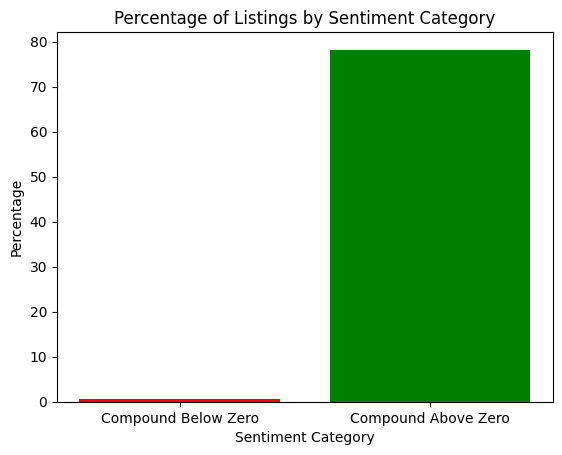

In [490]:
plt.bar(categories, percentages, color=['red', 'green'])
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage')
plt.title('Percentage of Listings by Sentiment Category')
plt.show()

### Correlogram using Seaborn Pairplot:

In [491]:
import seaborn as sns

In [492]:
numerical_vars = ['host_response_rate', 'review_scores_rating', 'review_scores_accuracy',
                  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                  'positivity_mean', 'negativity_mean', 'positivity_simple_mean', 'negativity_simple_mean', 'price']
correlation_df = listings_df[numerical_vars]

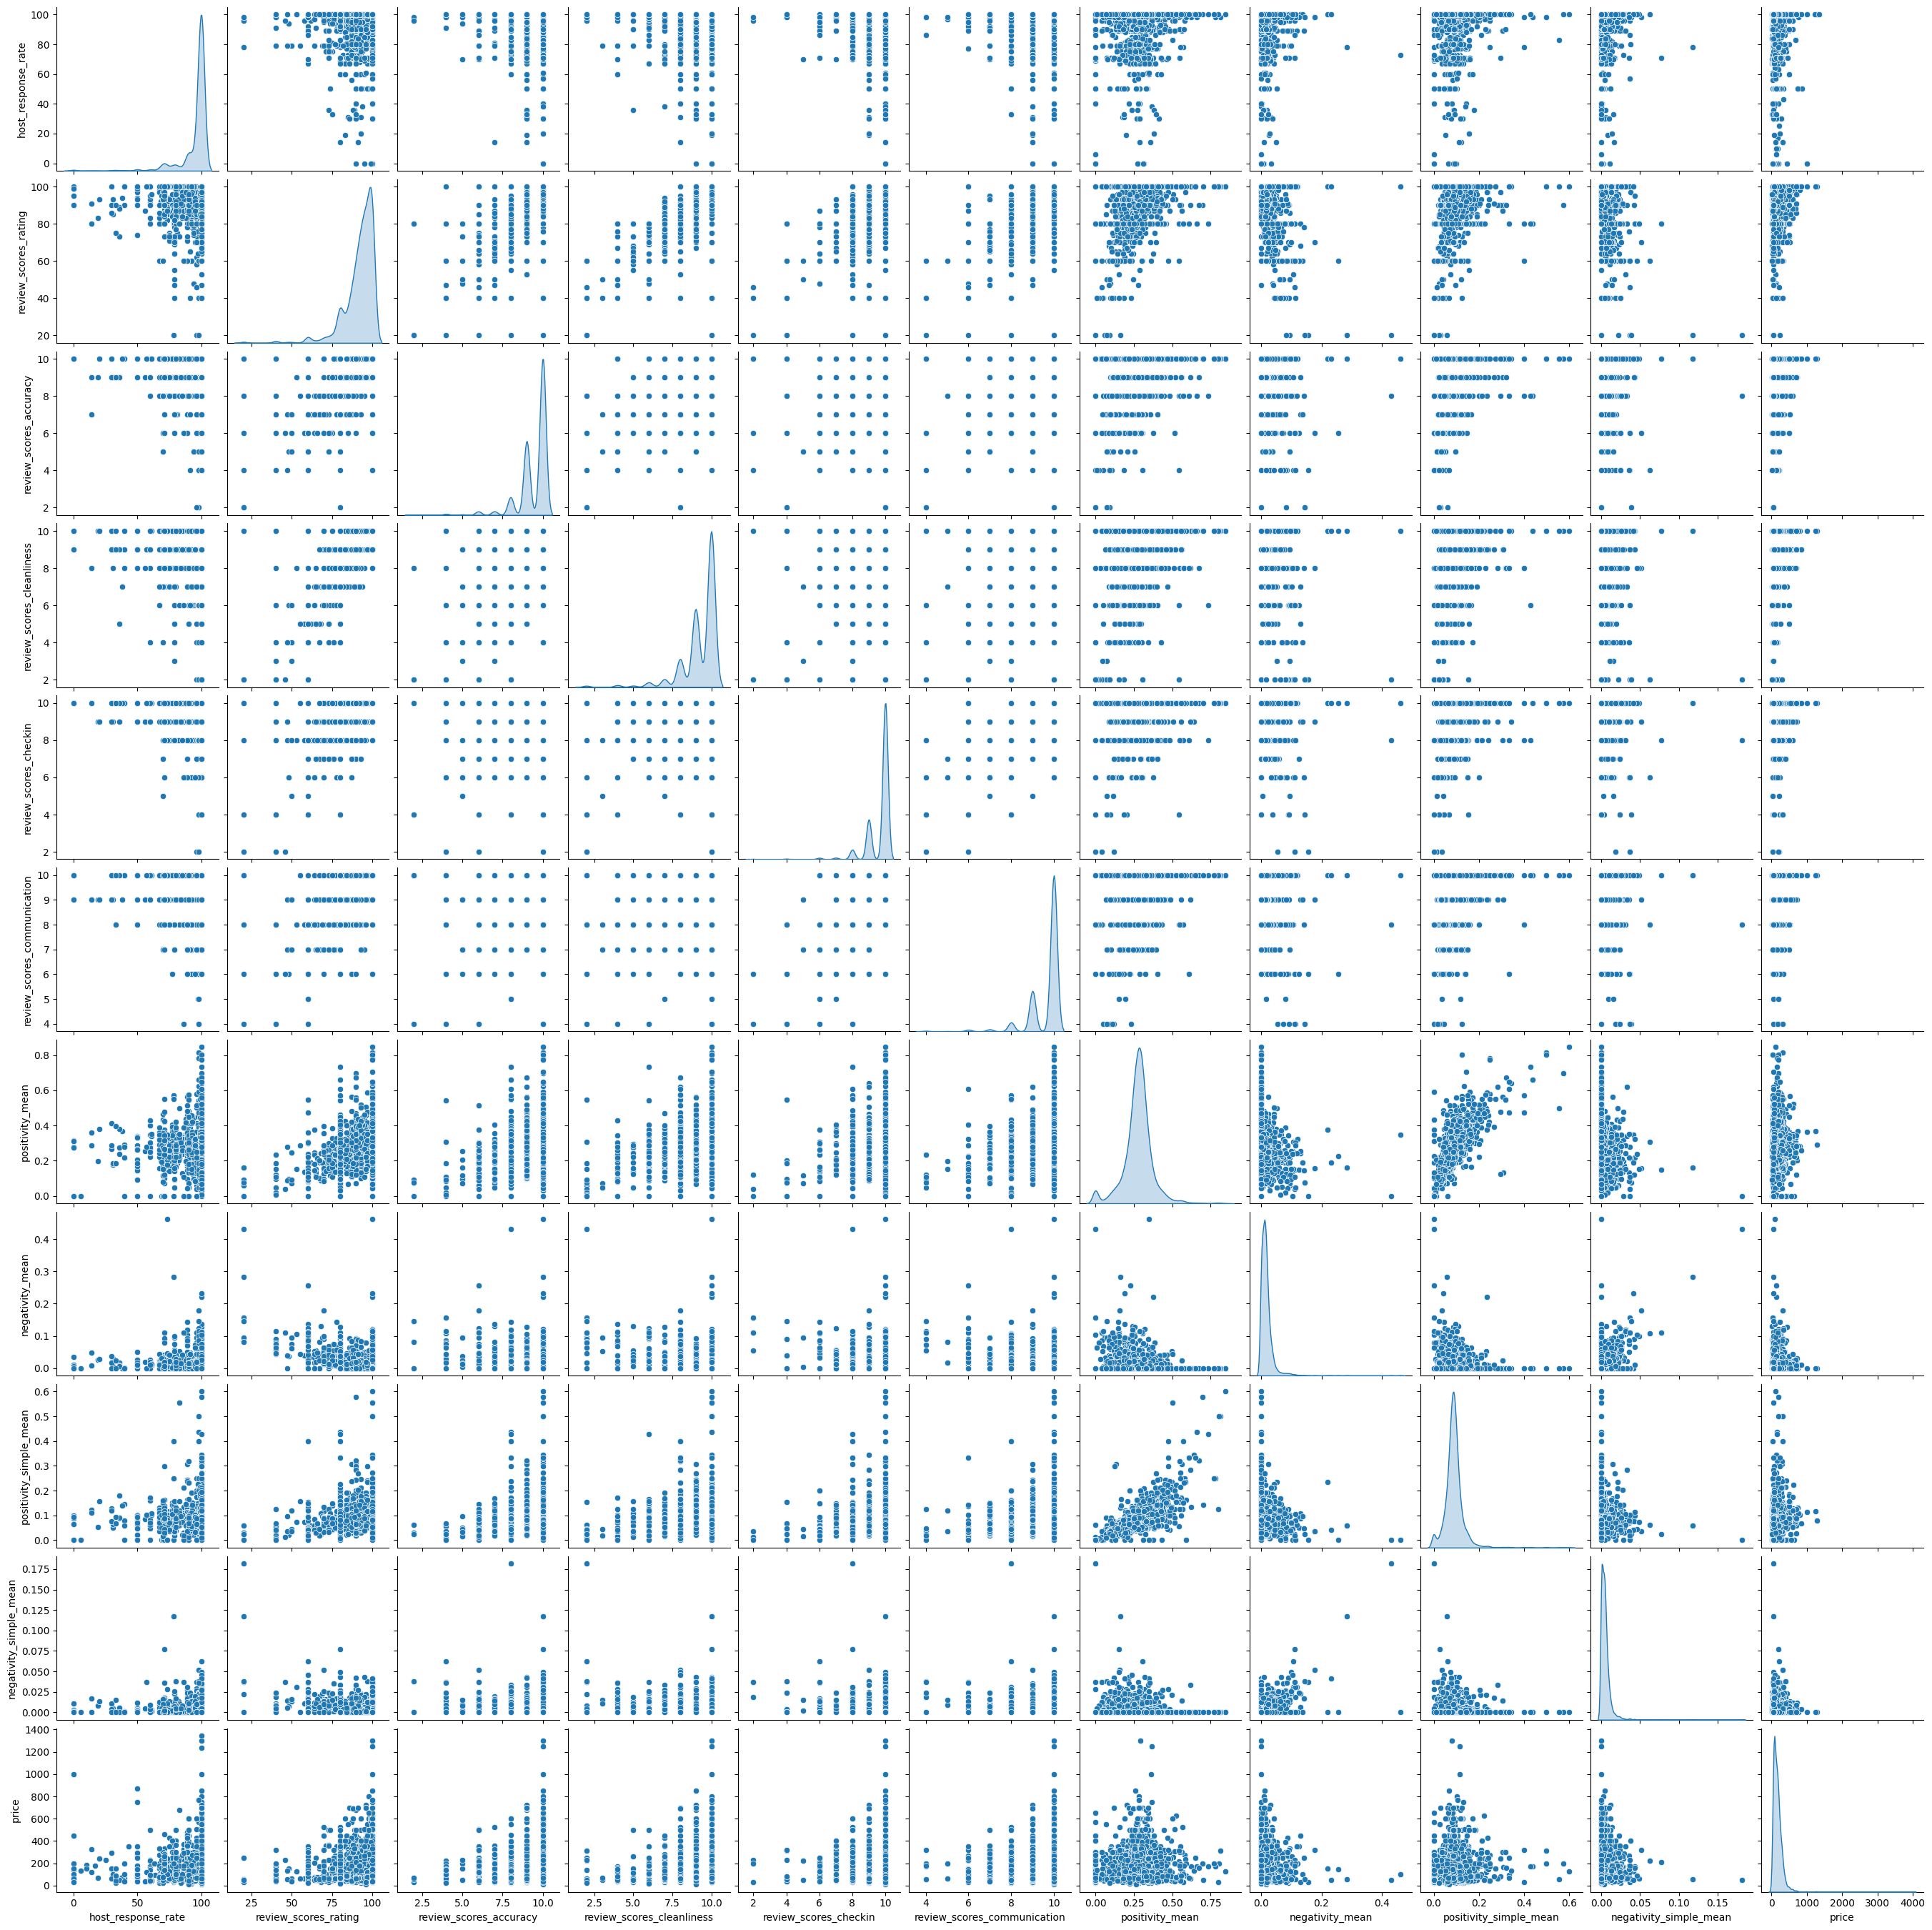

In [493]:
sns.pairplot(correlation_df, kind='scatter', diag_kind='kde')
plt.show()

### Pairplot for Principal Components

In [494]:
X_pca

array([[-1.92931998e-15,  1.63885937e-14,  4.40157824e-16],
       [-7.83690253e-01,  4.59120533e-02,  5.73381818e-01],
       [-1.05064565e+00, -5.10393809e-01, -1.29331777e-01],
       ...,
       [ 6.76496903e-02, -7.22480966e-02, -2.27376617e-01],
       [ 8.92744382e-01,  1.27519844e+00, -1.47547774e+00],
       [-1.99532316e-02,  2.13095286e-02,  6.70645835e-02]])

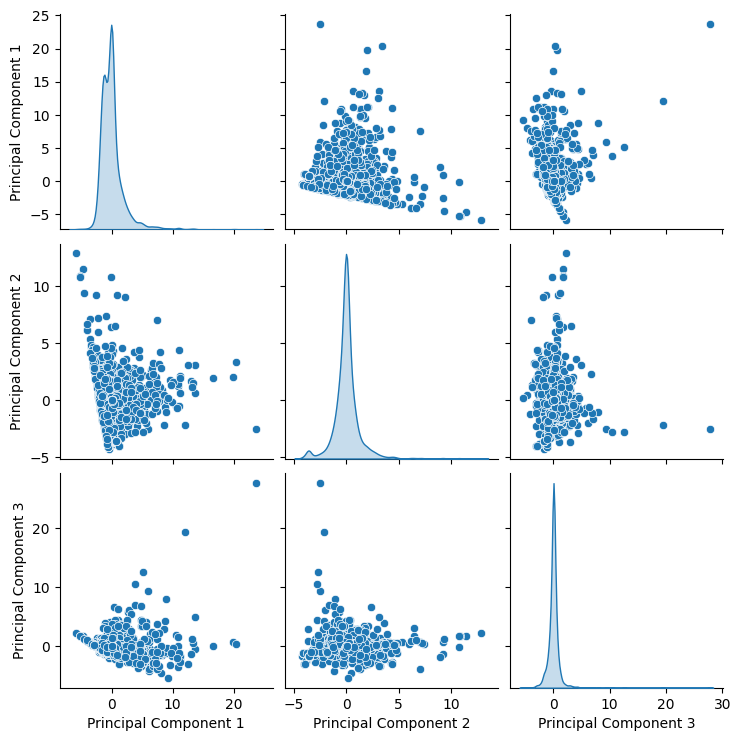

In [495]:
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

sns.pairplot(pca_df, kind='scatter', diag_kind='kde')
plt.show()

###  Table for the linear regression output in Q6

In [496]:
r_squared = model_lr.rsquared
n_observations = model_lr.nobs
df_model = model_lr.df_model
df_resid = model_lr.df_resid

In [497]:
coefficients = model_lr.params
p_values = model_lr.pvalues

In [498]:
table_data = {
    "Variable": coefficients.index,
    "Coefficient": coefficients.values,
    "P-Value": p_values,
}

additional_info = {
    "Number of Observations": n_observations,
    "Degrees of Freedom (Model)": df_model,
    "Degrees of Freedom (Residual)": df_resid,
    "R-squared": r_squared,
}

In [499]:
print("Linear Regression Summary Table:")
print(pd.DataFrame(table_data))
print("\nAdditional Information:")
for key, value in additional_info.items():
    print(f"{key}: {value}")

Linear Regression Summary Table:
                                                Variable  Coefficient  \
const                                              const   169.518509   
host_response_rate                    host_response_rate    -0.123812   
review_scores_rating                review_scores_rating     1.461382   
review_scores_accuracy            review_scores_accuracy   -11.592529   
review_scores_cleanliness      review_scores_cleanliness    17.174179   
review_scores_checkin              review_scores_checkin   -11.651747   
review_scores_communication  review_scores_communication    -6.062882   
positivity_mean                          positivity_mean   -65.854542   
negativity_mean                          negativity_mean   -66.395458   
positivity_simple_mean            positivity_simple_mean   215.564275   
negativity_simple_mean            negativity_simple_mean   639.388247   

                              P-Value  
const                        0.000355  
host_respo

### Table for the Linear Regression using PCA

In [500]:
coefficients = model.coef_
intercept = model.intercept_

In [501]:
coefficients_df = pd.DataFrame({'Principal Component': [f'PC{i+1}' for i in range(X_pca.shape[1])], 'Coefficient': coefficients})

In [502]:
r_squared = model.score(X_pca, Y)

In [503]:
print("Linear Regression (PCA) Summary Table:")
print(coefficients_df)
print("\nIntercept:", intercept)
print("R-squared:", r_squared)

Linear Regression (PCA) Summary Table:
  Principal Component  Coefficient
0                 PC1    -3.890870
1                 PC2     1.654073
2                 PC3     0.130949

Intercept: 173.9258019525802
R-squared: 0.002936994174732699
